# Segmentez des clients d'un site e-commerce


## Notebook d'analyse exploratoire

# <a name="C2"> Importation des données</a>

J'importe les librairies nécessaires.

In [93]:
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import numpy as np

Je charge mes données, j'utilise quatre DataFrame.

In [94]:
data1 = pd.read_csv("olist_customers_dataset.csv")
data1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [95]:
data2 = pd.read_csv("olist_orders_dataset.csv")
data2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [96]:
data3 = pd.read_csv("olist_order_items_dataset.csv")
data3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [97]:
data4 = pd.read_csv("olist_order_reviews_dataset.csv")
data4.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Je fusionne les DataFrame selon la clé commune.

In [98]:
data = pd.merge(data1, data2, on = "customer_id")
data = pd.merge(data, data3, on = "order_id")
data = pd.merge(data, data4, on = "order_id")
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


Je garde les colonnes qui m'interessent. 

In [99]:
data = data.loc[:, ["customer_unique_id", "order_purchase_timestamp", "price", "review_score"]]
data

,customer_unique_id,order_purchase_timestamp,price,review_score
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,124.99,4
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,289.00,5
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,139.94,5
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,149.94,5
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,230.00,5
...,...,...,...,...
112367,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,74.90,4
112368,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,114.90,5
112369,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,37.00,1
112370,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,689.00,5


J'agrège mes données en sommant les prix pour avoir le montant total des achats, en prenant le max de la dernière commande pour avoir la date de la dernière commande et en comptant le nombre d'ocurrance de customer_unique_id pour avoir la fréquence de commande. Je fais également la moyenne des review score pour avoir la note d'évaluation de commande moyenne par client.
Je renomme mes colonnes pour plus de lisibilité, j'ai bien mes données RFM.

In [100]:
data = data.groupby("customer_unique_id").agg({"order_purchase_timestamp" : "max", "customer_unique_id" : "count",
                                               "price": "sum", "review_score" : "mean"})

data.rename(columns = {"price":"Monetary", "order_purchase_timestamp" : "Recency", "customer_unique_id" : "Frequency",
                       "review_score" : "Average_review_score"}, inplace = True)
data.head()

,Recency,Frequency,Monetary,Average_review_score
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90,4.0
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00,3.0
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99,4.0
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00,5.0


# <a name="C2"> Nettoyage du jeu de données</a>

###  1) Erreurs de type

Je vérifie que les variables ont été importées dans le bon type. 

In [62]:
data.dtypes

Recency                  object
Frequency                 int64
Monetary                float64
Average_review_score    float64
dtype: object

La variable Recency ne semble pas être considérée comme une date, je corrige cela à l'aide de la fonction do_datetime.

In [63]:
data["Recency"] = pd.to_datetime(data["Recency"])

### 2) Valeurs manquantes

J'analyse le taux de répartition de mes données.

In [64]:
data.isnull().sum()

Recency                 0
Frequency               0
Monetary                0
Average_review_score    0
dtype: int64

### 3) Doublons 

J'analyse les éventuels doublons présent dans mon jeu de données.

In [65]:
data.duplicated(keep = "last")

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    False
0000b849f77a49e4a4ce2b2a4ca5be3f    False
0000f46a3911fa3c0805444483337064    False
0000f6ccb0745a6a4b88665a16c9f078    False
0004aac84e0df4da2b147fca70cf8255    False
                                    ...  
fffcf5a5ff07b0908bd4e2dbc735a684    False
fffea47cd6d3cc0a88bd621562a9d061    False
ffff371b4d645b6ecea244b27531430a    False
ffff5962728ec6157033ef9805bacc48    False
ffffd2657e2aad2907e67c3e9daecbeb    False
Length: 94721, dtype: bool

### 4) Détéction d'outliers

J'analyse les principales statistiques descriptives pour détécter d'éventuelles valeurs aberrantes ou atypiques. 

In [66]:
data.describe()

,Frequency,Monetary,Average_review_score
count,94721.000000,94721.000000,94721.000000
mean,1.186347,142.811254,4.102202
std,0.646716,217.714921,1.326758
min,1.000000,0.850000,1.000000
25%,1.000000,47.900000,4.000000
50%,1.000000,89.900000,5.000000
75%,1.000000,155.960000,5.000000
max,24.000000,13440.000000,5.000000


# <a name="C2"> Feature engineering</a>

Je commence par modifier la date du dernier achat par le nombre de jour écoulé depuis le dernier achat.

In [67]:
date = datetime.now()
date = pd.to_datetime(date)
date

Timestamp('2023-01-16 10:26:53.831039')

In [68]:
data["Recency"] = (date - data["Recency"]).dt.days
data["Recency"].head()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1711
0000b849f77a49e4a4ce2b2a4ca5be3f    1714
0000f46a3911fa3c0805444483337064    2137
0000f6ccb0745a6a4b88665a16c9f078    1921
0004aac84e0df4da2b147fca70cf8255    1888
Name: Recency, dtype: int64

Ensuite, je calcule le panier moyen par client.

In [69]:
data["Average_shopping_basket"] = data["Monetary"] / data["Frequency"]
data.head()

,Recency,Frequency,Monetary,Average_review_score,Average_shopping_basket
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1711,1,129.90,5.0,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1714,1,18.90,4.0,18.90
0000f46a3911fa3c0805444483337064,2137,1,69.00,3.0,69.00
0000f6ccb0745a6a4b88665a16c9f078,1921,1,25.99,4.0,25.99
0004aac84e0df4da2b147fca70cf8255,1888,1,180.00,5.0,180.00


# <a name="C2"> Analyse univariée </a>

J'analyse la distribution des notes moyennes.

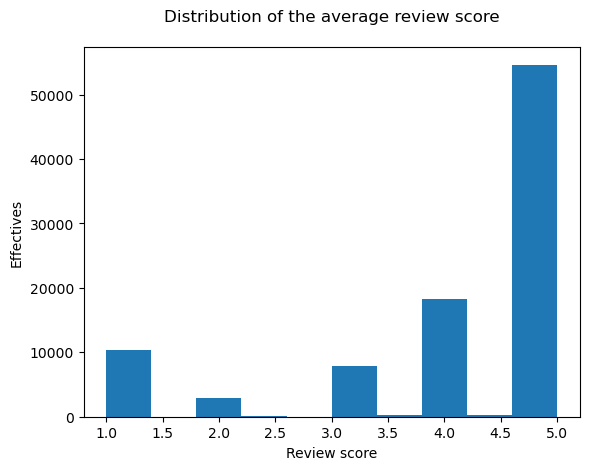

In [70]:
plt.hist(data["Average_review_score"])
plt.title("Distribution of the average review score\n")
plt.xlabel("Review score")
plt.ylabel("Effectives")
plt.show()

J'affiche ensuite la boîte à moustache du panier moyen, en cachant les outliers et en affichant la médiane.

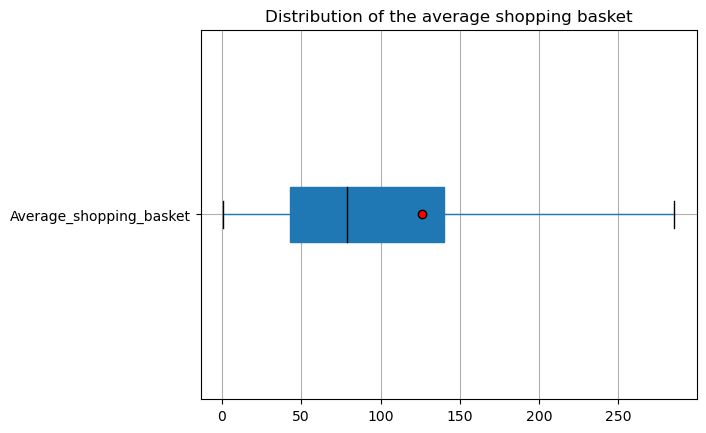

In [71]:
data.boxplot(column = "Average_shopping_basket", showfliers=False, vert = False, showmeans = True, patch_artist = True,
             medianprops = {"color" : "black"}, meanprops = {"marker" : "o", "markeredgecolor" : "black",
                                                             "markerfacecolor" : "red"})

plt.title("Distribution of the average shopping basket")
plt.show()

# <a name="C2"> Analyse multivariée </a>

J'analyse la dispersion entre les variables.

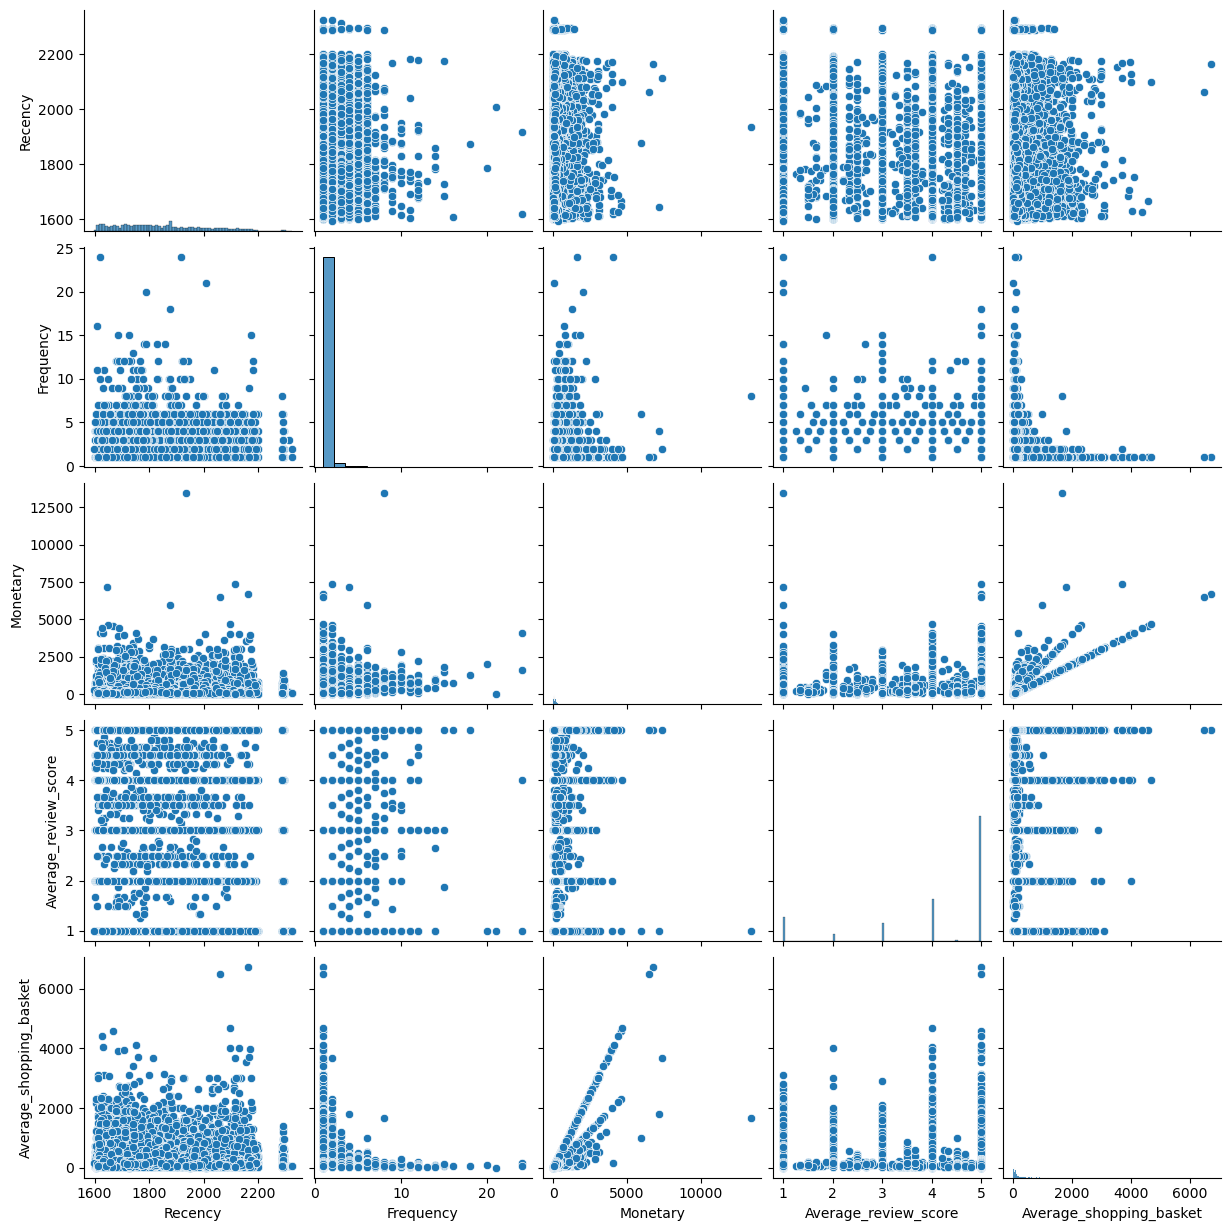

In [72]:
sns.pairplot(data)
plt.show(block = True)

### PCA

Je sépare mes données, d'un côté X la matrice de données.

In [73]:
X = data.values
X[:5]

array([[1.711e+03, 1.000e+00, 1.299e+02, 5.000e+00, 1.299e+02],
       [1.714e+03, 1.000e+00, 1.890e+01, 4.000e+00, 1.890e+01],
       [2.137e+03, 1.000e+00, 6.900e+01, 3.000e+00, 6.900e+01],
       [1.921e+03, 1.000e+00, 2.599e+01, 4.000e+00, 2.599e+01],
       [1.888e+03, 1.000e+00, 1.800e+02, 5.000e+00, 1.800e+02]])

In [74]:
names = data.index
names

Index(['0000366f3b9a7992bf8c76cfdf3221e2', '0000b849f77a49e4a4ce2b2a4ca5be3f',
       '0000f46a3911fa3c0805444483337064', '0000f6ccb0745a6a4b88665a16c9f078',
       '0004aac84e0df4da2b147fca70cf8255', '0004bd2a26a76fe21f786e4fbd80607f',
       '00050ab1314c0e55a6ca13cf7181fecf', '00053a61a98854899e70ed204dd4bafe',
       '0005e1862207bf6ccc02e4228effd9a0', '0005ef4cd20d2893f0d9fbd94d3c0d97',
       ...
       'fff96bc586f78b1f070da28c4977e810', 'fffa431dd3fcdefea4b1777d114144f2',
       'fffb09418989a0dbff854a28163e47c6', 'fffbf87b7a1a6fa8b03f081c5f51a201',
       'fffcc512b7dfecaffd80f13614af1d16', 'fffcf5a5ff07b0908bd4e2dbc735a684',
       'fffea47cd6d3cc0a88bd621562a9d061', 'ffff371b4d645b6ecea244b27531430a',
       'ffff5962728ec6157033ef9805bacc48', 'ffffd2657e2aad2907e67c3e9daecbeb'],
      dtype='object', name='customer_unique_id', length=94721)

Et les features dans la variable features.

In [75]:
features = data.columns
features

Index(['Recency', 'Frequency', 'Monetary', 'Average_review_score',
       'Average_shopping_basket'],
      dtype='object')

Je commence par scaler mes données et les transformer.

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.83250272, -0.28814564, -0.0593038 ,  0.67668919,  0.01872465],
       [-0.81291639, -0.28814564, -0.56914752, -0.07703159, -0.56423091],
       [ 1.94875701, -0.28814564, -0.33902887, -0.83075237, -0.30111313],
       [ 0.53854081, -0.28814564, -0.53658183, -0.07703159, -0.52699528],
       [ 0.32309111, -0.28814564,  0.17081485,  0.67668919,  0.28184243]])

Je vérifie que la moyenne soit égale à 0 et l'écart-type à 1.

In [77]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4
mean,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0


Je travaille sur mes 5 composantes.

In [78]:
n_components = 5

J'instancie mon ACP.

In [79]:
pca = PCA(n_components = n_components)

Je l'entraîne sur les données scalées.

In [80]:
pca.fit(X_scaled)

PCA(n_components=5)

On s'intéresse à la variance captée par chaque nouvelle composante.

In [81]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([38.53, 22.11, 20.07, 18.25,  1.04])

Je calcule la somme cumulée.

In [82]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 39.,  61.,  81.,  99., 100.])

Je définis une variable avec la liste des composantes.

In [83]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5]

Je l'affiche de façon graphique.

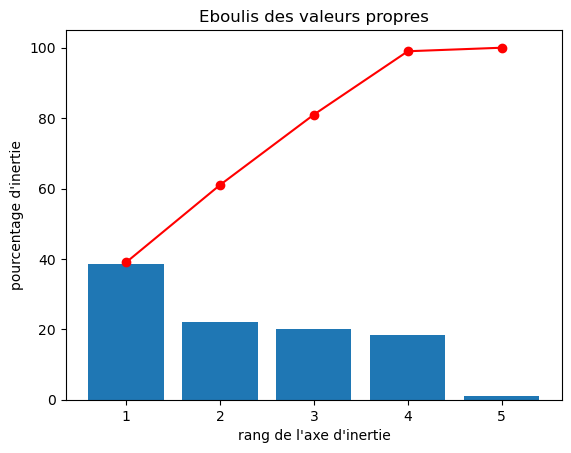

In [84]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

En bleu : variance de chaque nouvelle composantes.
En rouge : variance cumulée. 
On remarque que près de 75% de la variance est comrpise dans les 2 premières composantes.

On s'interesse maintenant aux composantes.

In [85]:
pcs = pd.DataFrame(pca.components_)
pcs

,0,1,2,3,4
0,0.005711,0.115884,0.709819,-0.051423,0.692857
1,0.062988,0.726555,0.014719,-0.658290,-0.185976
2,-0.975241,0.182938,0.018729,0.118325,-0.032964
3,0.211904,0.623868,0.058899,0.741625,-0.111390
4,0.001145,-0.189764,0.701513,0.000419,-0.686927


On continue.

In [86]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Recency,Frequency,Monetary,Average_review_score,Average_shopping_basket
F1,0.01,0.12,0.71,-0.05,0.69
F2,0.06,0.73,0.01,-0.66,-0.19
F3,-0.98,0.18,0.02,0.12,-0.03
F4,0.21,0.62,0.06,0.74,-0.11
F5,0.00,-0.19,0.70,0.00,-0.69


Pour une représentation plus visuelle.

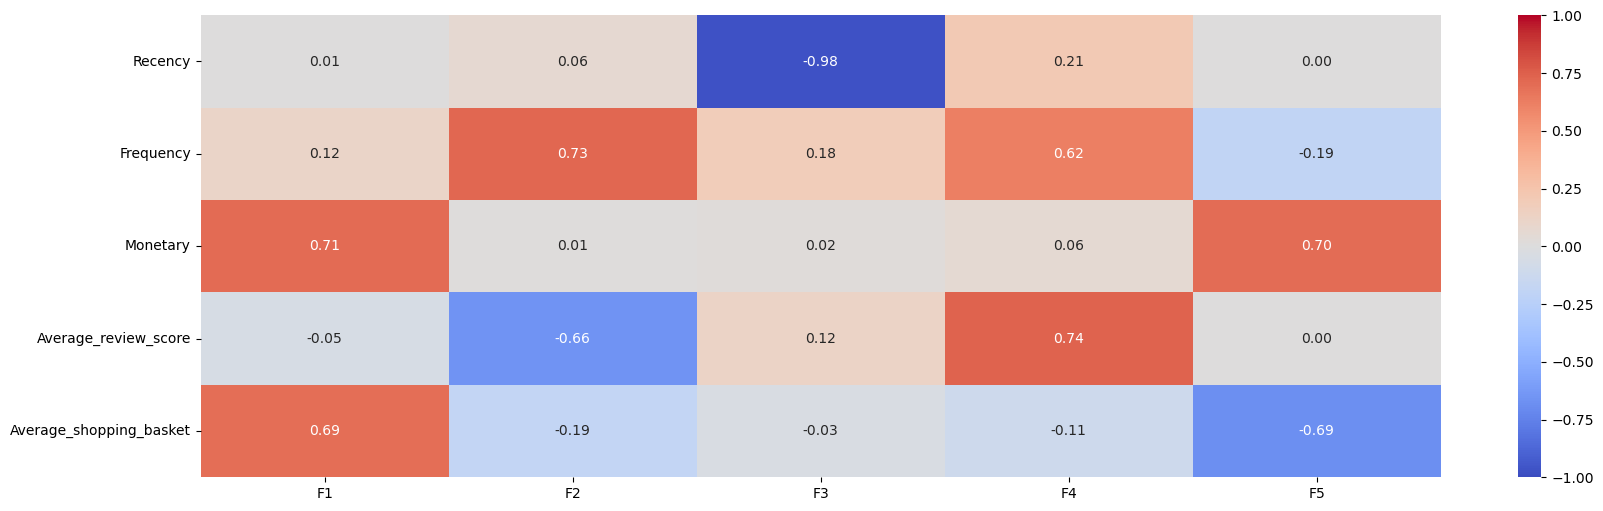

In [87]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show(block=False)

Je génère ensuite le cercle de corrélation.

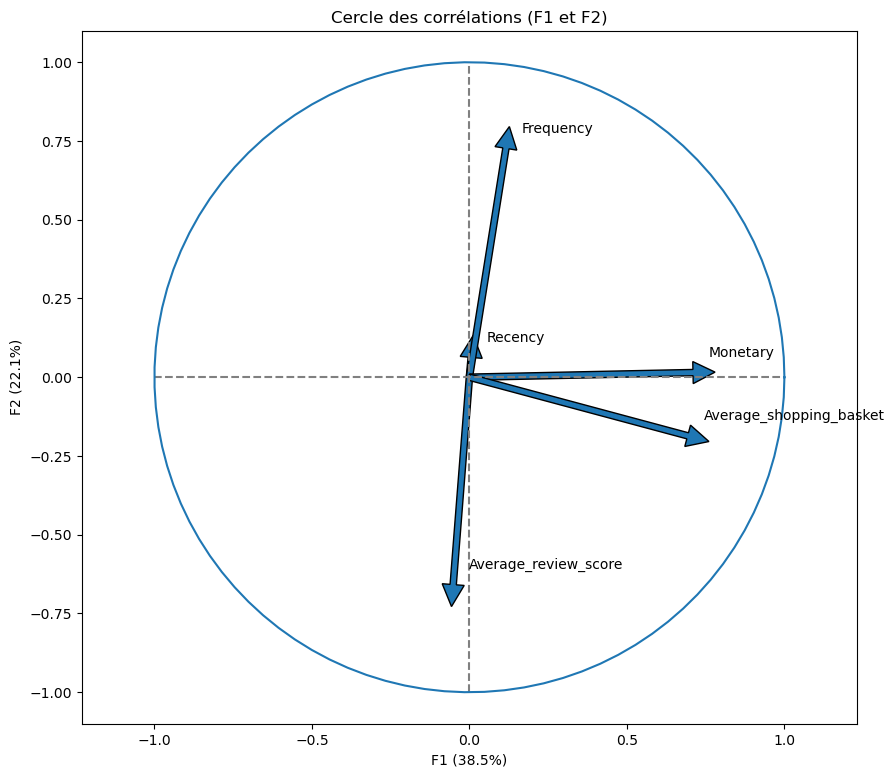

In [88]:
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

On travaille maintenant sur la projection de nos dimensions. On calcule les coordonnées de nos individus dans notre nouvel espace.

In [89]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.02064906e-01, -7.11604730e-01,  8.37519538e-01,
         1.40095608e-01, -4.55170029e-04],
       [-8.28995937e-01, -1.13292441e-01,  7.38901548e-01,
        -3.79826494e-01,  4.20374347e-02],
       [-4.28819326e-01,  5.11280853e-01, -2.04794373e+00,
        -3.69349890e-01,  2.55736415e-02],
       [-7.72362885e-01, -3.46122692e-02, -5.79712570e-01,
        -9.56767106e-02,  4.08525661e-02],
       [ 2.50180437e-01, -6.84362540e-01, -2.93826610e-01,
         3.69215846e-01, -1.84429517e-02]])

In [90]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):


    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


J'applique sur F1 et F2.

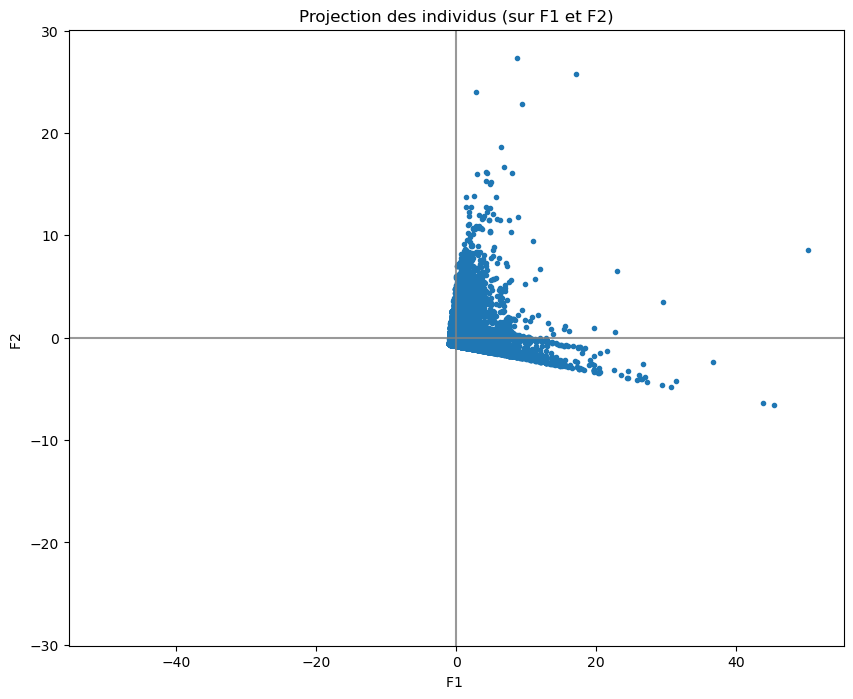

In [91]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

In [92]:
data.to_csv('data.csv') 